In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Flask==2.0.2
!pip install gevent==20.9.0
!pip install keras==2.7.0
!pip install keras-nightly==2.5.0.dev2021032900
!pip install numpy==1.18.5
!pip install scikit-image==0.17.2
!pip install Werkzeug==2.0.2
!pip install scikit-image==0.17.2  # Note: This may have been a typo in your requirements. Corrected here.
!pip install tensorflow==2.5.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: Flask
    Found existing installation: Flask 2.2.5
    Uninstalling Flask-2.2.5:
      Successfully uninstalled Flask-2.2.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing install

In [ ]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import numpy as np
from keras.preprocessing import image

from keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

from skimage.transform import resize

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename

# Define a flask app
app = Flask(__name__)

# Load your trained model
model = load_model("/content/test_file.jpg")
print('Model loaded5. Check http://127.0.0.1:5000/')

def predict_breast_cancer(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    if preds[0][0] == 0:
        return "The tumor is benign. No need to worry!"
    else:
        return "It is a malignant tumor. Please consult a doctor."

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['image']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        result = predict_breast_cancer(file_path)

        return render_template('result.html', result=result)

    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True, threaded=True)


OSError: No file or directory found at /content/test_file.jpg

In [ ]:
from google.colab import files
files.upload()


Saving dataR2.xlsx to dataR2.xlsx


{'dataR2.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dha\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
from google.colab import files
files.upload()

Saving Data (1).txt to Data (1).txt


{'Data (1).txt': b'Age\tBMI\tGlucose\tInsulin\tHOMA\tLeptin\tAdiponectin\tResistin\tMCP.1\tClassification\r\n48\t23.5\t70\t2.707\t0.467408667\t8.8071\t9.7024\t7.99585\t417.114\t1\r\n83\t20.69049454\t92\t3.115\t0.706897333\t8.8438\t5.429285\t4.06405\t468.786\t1\r\n82\t23.12467037\t91\t4.498\t1.009651067\t17.9393\t22.43204\t9.27715\t554.697\t1\r\n68\t21.36752137\t77\t3.226\t0.612724933\t9.8827\t7.16956\t12.766\t928.22\t1\r\n86\t21.11111111\t92\t3.549\t0.8053864\t6.6994\t4.81924\t10.57635\t773.92\t1\r\n49\t22.85445769\t92\t3.226\t0.732086933\t6.8317\t13.67975\t10.3176\t530.41\t1\r\n89\t22.7\t77\t4.69\t0.890787333\t6.964\t5.589865\t12.9361\t1256.083\t1\r\n76\t23.8\t118\t6.47\t1.883201333\t4.311\t13.25132\t5.1042\t280.694\t1\r\n73\t22\t97\t3.35\t0.801543333\t4.47\t10.358725\t6.28445\t136.855\t1\r\n75\t23\t83\t4.952\t1.013839467\t17.127\t11.57899\t7.0913\t318.302\t1\r\n34\t21.47\t78\t3.469\t0.6674356\t14.57\t13.11\t6.92\t354.6\t1\r\n29\t23.01\t82\t5.663\t1.145436133\t35.59\t26.72\t4.58\t174.

In [ ]:
#This librarys is to work with matrices
import pandas as pd
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
#Split
from sklearn.model_selection import train_test_split
# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size
rcParams['figure.figsize'] = 10,8

This input data is consisted of (116, 9)
This dataset is consisted of (116, 10)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 18)                180       
                                                                 
 dropout_12 (Dropout)        (None, 18)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                608       
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                        

Epoch 1/30
4/4 - 1s - loss: 0.6870 - accuracy: 0.4135 - 856ms/epoch - 214ms/step
Epoch 2/30
4/4 - 0s - loss: 0.6716 - accuracy: 0.4808 - 18ms/epoch - 5ms/step
Epoch 3/30
4/4 - 0s - loss: 0.6554 - accuracy: 0.4808 - 16ms/epoch - 4ms/step
Epoch 4/30
4/4 - 0s - loss: 0.6371 - accuracy: 0.4808 - 17ms/epoch - 4ms/step
Epoch 5/30
4/4 - 0s - loss: 0.6118 - accuracy: 0.4808 - 18ms/epoch - 4ms/step
Epoch 6/30
4/4 - 0s - loss: 0.5798 - accuracy: 0.4808 - 27ms/epoch - 7ms/step
Epoch 7/30
4/4 - 0s - loss: 0.5408 - accuracy: 0.4808 - 19ms/epoch - 5ms/step
Epoch 8/30
4/4 - 0s - loss: 0.4914 - accuracy: 0.4808 - 17ms/epoch - 4ms/step
Epoch 9/30
4/4 - 0s - loss: 0.4117 - accuracy: 0.4808 - 19ms/epoch - 5ms/step
Epoch 10/30
4/4 - 0s - loss: 0.3166 - accuracy: 0.4808 - 17ms/epoch - 4ms/step
Epoch 11/30
4/4 - 0s - loss: 0.2471 - accuracy: 0.4808 - 16ms/epoch - 4ms/step
Epoch 12/30
4/4 - 0s - loss: 0.1249 - accuracy: 0.4808 - 16ms/epoch - 4ms/step
Epoch 13/30
4/4 - 0s - loss: 0.0051 - accuracy: 0.4808 - 1

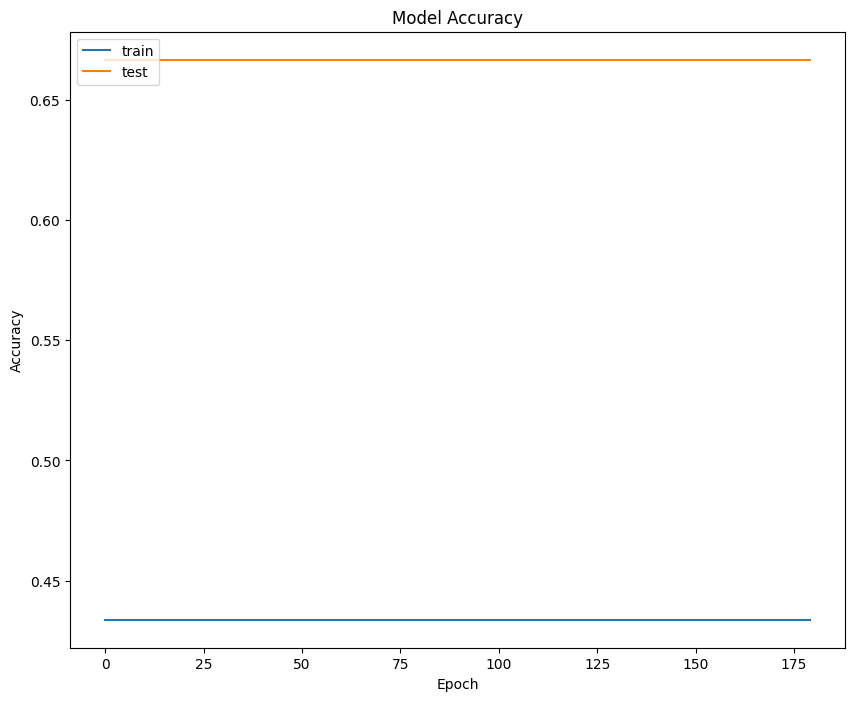

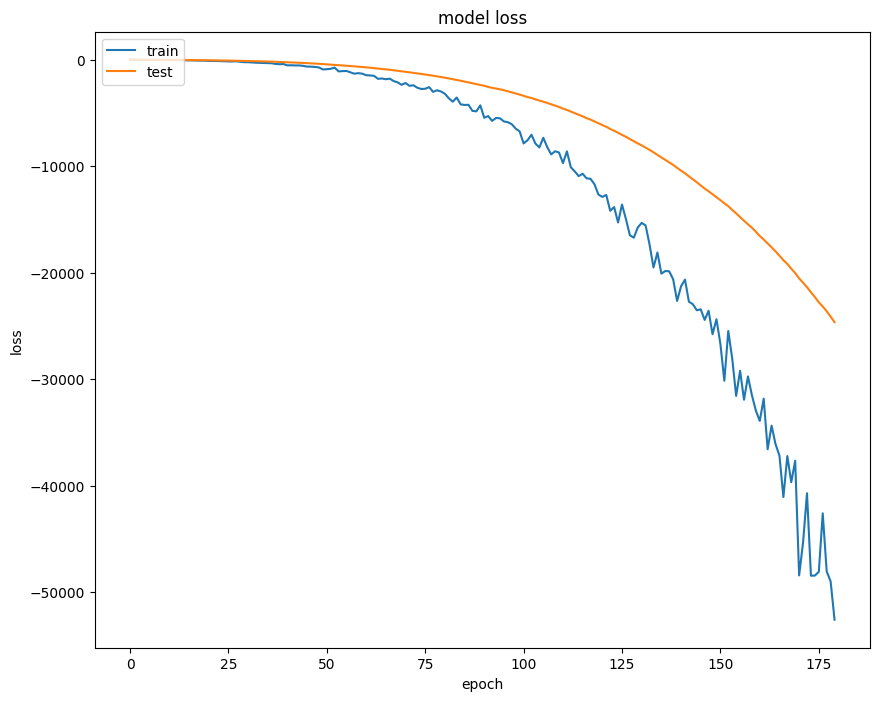

In [ ]:
#This librarys is to work with matrices
import pandas as pd
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
#Split
from sklearn.model_selection import train_test_split
# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size
rcParams['figure.figsize'] = 10,8
df = pd.read_csv('/content/Data (1).txt',delimiter='\t')
df.describe()
X = df.drop('Classification', axis=1)
Y = df.Classification
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
print("This input data is consisted of",X.shape)
print("This dataset is consisted of",df.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import graphviz
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(18,
                activation='relu',
                input_dim=9,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer.
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))
# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
model.compile(optimizer = RMSprop(),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train,
               batch_size = 30,
               epochs = 30, verbose=2)
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_split=0.20,
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# New Section

This input data is consisted of (116, 9)
This dataset is consisted of (116, 10)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 18)                180       
                                                                 
 dropout_14 (Dropout)        (None, 18)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                608       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                        

Epoch 1/30
4/4 - 1s - loss: 0.6866 - accuracy: 0.4231 - 917ms/epoch - 229ms/step
Epoch 2/30
4/4 - 0s - loss: 0.6711 - accuracy: 0.4904 - 19ms/epoch - 5ms/step
Epoch 3/30
4/4 - 0s - loss: 0.6555 - accuracy: 0.4904 - 17ms/epoch - 4ms/step
Epoch 4/30
4/4 - 0s - loss: 0.6353 - accuracy: 0.4904 - 17ms/epoch - 4ms/step
Epoch 5/30
4/4 - 0s - loss: 0.6124 - accuracy: 0.4904 - 17ms/epoch - 4ms/step
Epoch 6/30
4/4 - 0s - loss: 0.5846 - accuracy: 0.4904 - 16ms/epoch - 4ms/step
Epoch 7/30
4/4 - 0s - loss: 0.5450 - accuracy: 0.4904 - 16ms/epoch - 4ms/step
Epoch 8/30
4/4 - 0s - loss: 0.4980 - accuracy: 0.4904 - 16ms/epoch - 4ms/step
Epoch 9/30
4/4 - 0s - loss: 0.4347 - accuracy: 0.4904 - 18ms/epoch - 4ms/step
Epoch 10/30
4/4 - 0s - loss: 0.3598 - accuracy: 0.4904 - 17ms/epoch - 4ms/step
Epoch 11/30
4/4 - 0s - loss: 0.2529 - accuracy: 0.4904 - 19ms/epoch - 5ms/step
Epoch 12/30
4/4 - 0s - loss: 0.1771 - accuracy: 0.4904 - 18ms/epoch - 4ms/step
Epoch 13/30
4/4 - 0s - loss: 0.0396 - accuracy: 0.4904 - 1

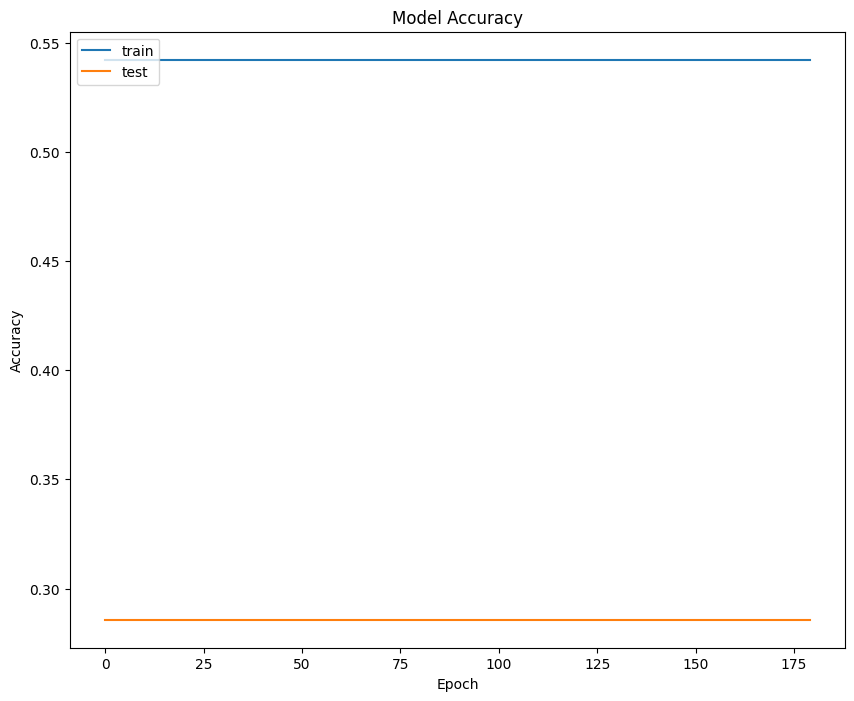

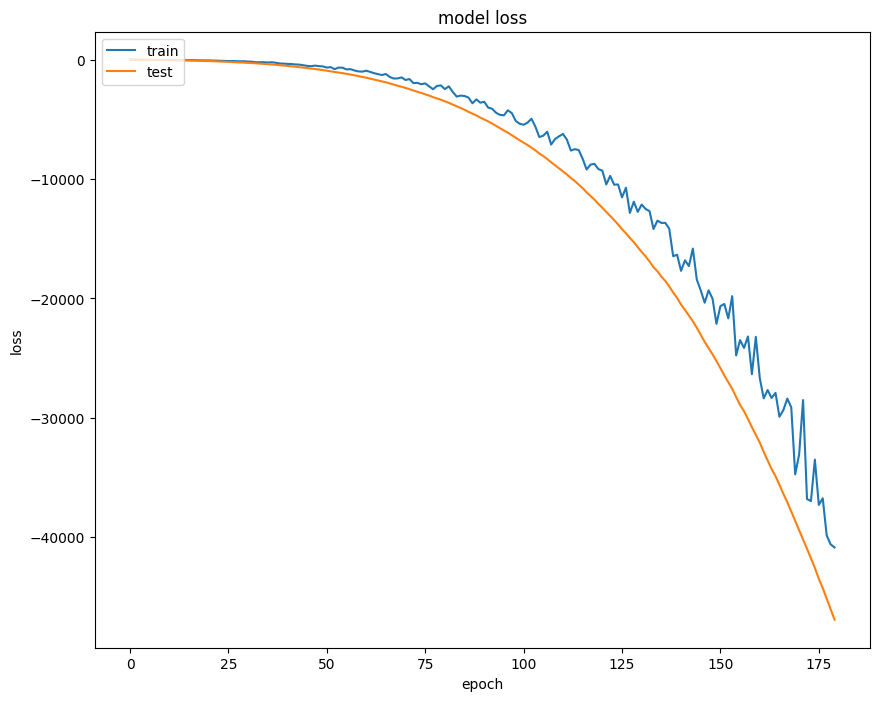

In [ ]:
#This librarys is to work with matrices
import pandas as pd
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
#Split
from sklearn.model_selection import train_test_split
# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size
rcParams['figure.figsize'] = 10,8
#This librarys is to work with matrices
import pandas as pd
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
#Split
from sklearn.model_selection import train_test_split
# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size
rcParams['figure.figsize'] = 10,8
df = pd.read_csv('/content/Data (1).txt',delimiter='\t')
df.describe()
X = df.drop('Classification', axis=1)
Y = df.Classification
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)
print("This input data is consisted of",X.shape)
print("This dataset is consisted of",df.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import graphviz
# Creating the model
model = Sequential()

# Inputing the first layer with input dimensions
model.add(Dense(18,
                activation='relu',
                input_dim=9,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer.
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))
# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu'))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()
#Creating an Stochastic Gradient Descent
sgd = SGD(lr = 0.01, momentum = 0.9)

# Compiling our model
model.compile(optimizer = RMSprop(),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
#optimizers list
#optimizers['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Fitting the ANN to the Training set
model.fit(X_train, y_train,
               batch_size = 30,
               epochs = 30, verbose=2)
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_split=0.20,
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()